Nama : Suluh Sulistiawan<br>
NIM : 211351143<br>
Kelas : Informatika Malam B

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sooluh","key":"3263255467dfd9219bb130807da12d0f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 62 Dec 26 10:20 kaggle.json


In [4]:
!kaggle datasets download -d jillanisofttech/brain-stroke-dataset

  0% 0.00/47.2k [00:00<?, ?B/s]
100% 47.2k/47.2k [00:00<00:00, 32.4MB/s]


In [5]:
!unzip brain-stroke-dataset -d dataset
!ls -l dataset

Archive:  brain-stroke-dataset.zip
  inflating: dataset/brain_stroke.csv  
total 280
-rw-r--r-- 1 root root 284887 Aug  4  2022 brain_stroke.csv


# Import Library

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv('dataset/brain_stroke.csv')

# Data Discovery

In [8]:
df.shape

(4981, 11)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


**Deskripsi Fitur**

- gender : Jenis kelamin ("Male" atau "Female")
- age : Umur (float)
- hypertension : Memiliki hipertensi? (boolean)
- hearth_disease : Memiliki penyakit jantung? (boolean)
- ever_married : Sudah pernah menikah? ("No" atau "Yes")
- work_type : Jenis pekerjaan ("Private", "Self-employed", "Govtjov" atau "children")
- Residence_type : Tipe tempat tinggal ("Rural" atau "Urban")
- avg_glucose_level : Kadar glukosa rata-rata (float)
- bmi : Indeks massa tubuh (float)
- smoking_status : Seberapa sering merokok ("never smoked", "formerly smoked", "smokes" atau "Unknown")
- stroke : Status, untuk output (boolean)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


**Analisis Fitur**

- Fitur Kategorikal : gender, hypertension, hearth_disease, ever_married, work_type, Residence_type, smoking_status, stroke
- Fitur Numerikal : age, avg_glucose_level, bmi

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.duplicated().sum()

0

# EDA

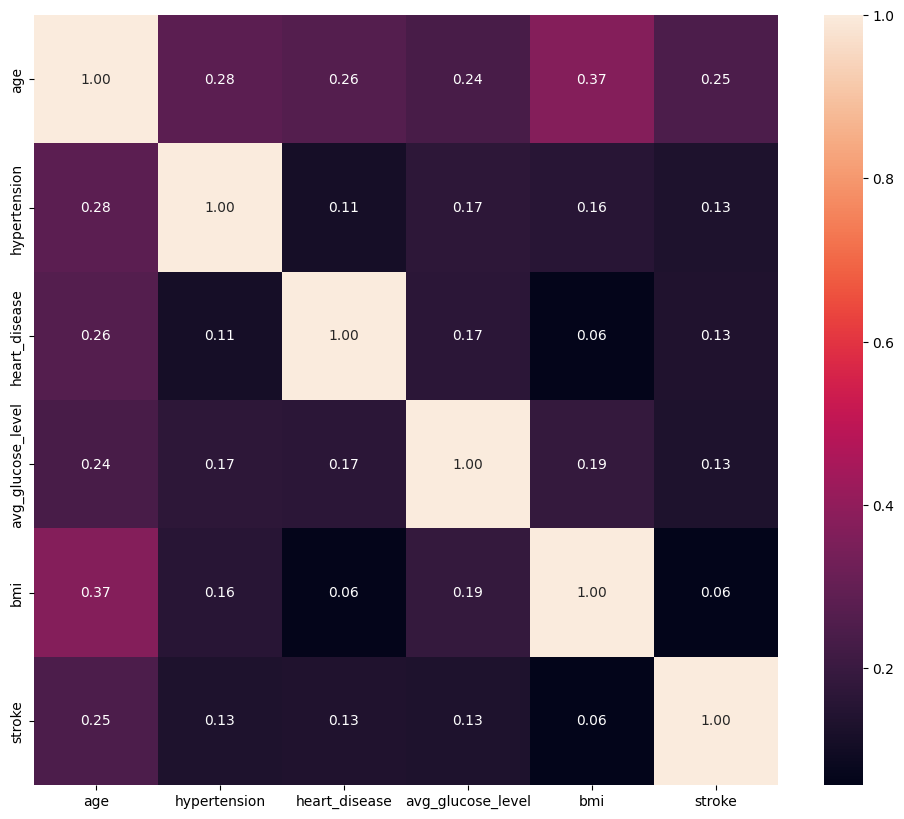

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt= ".2f")
plt.show()

**Fitur Kategorikal**

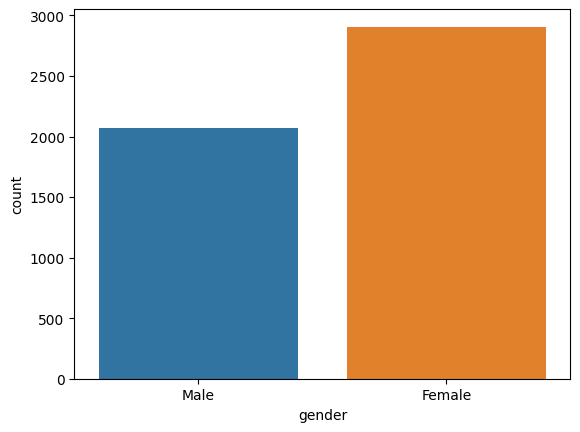

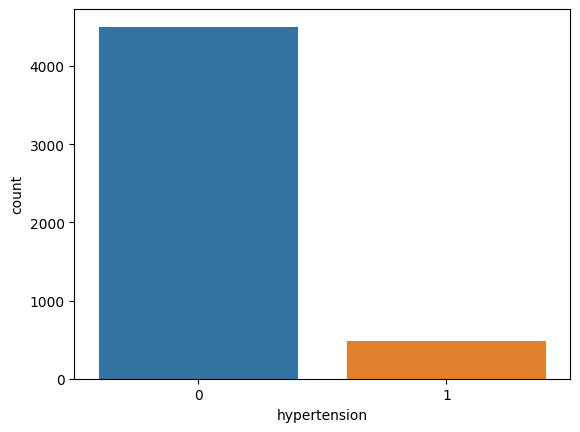

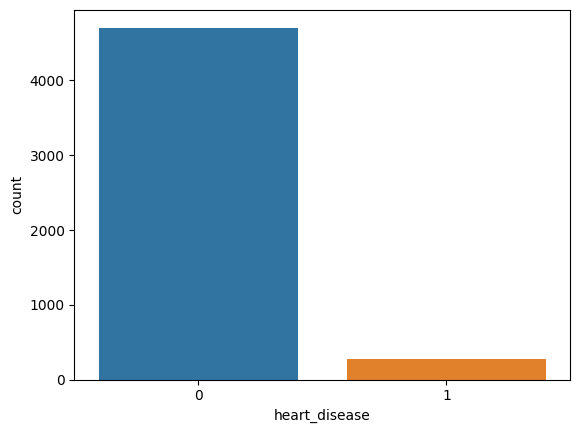

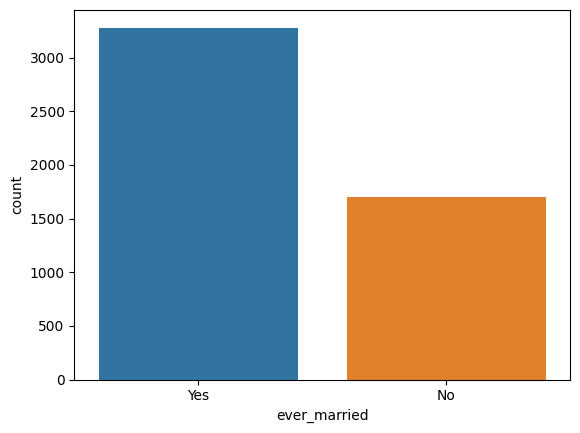

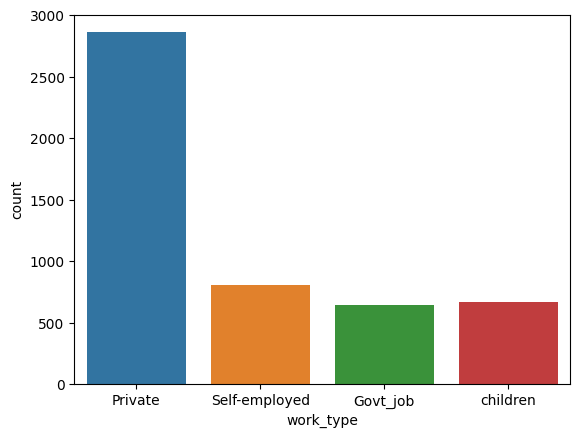

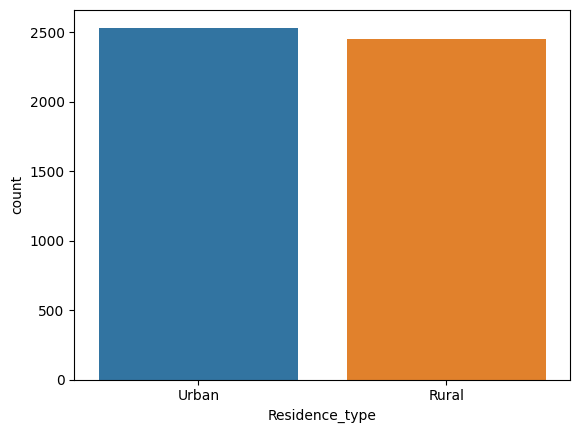

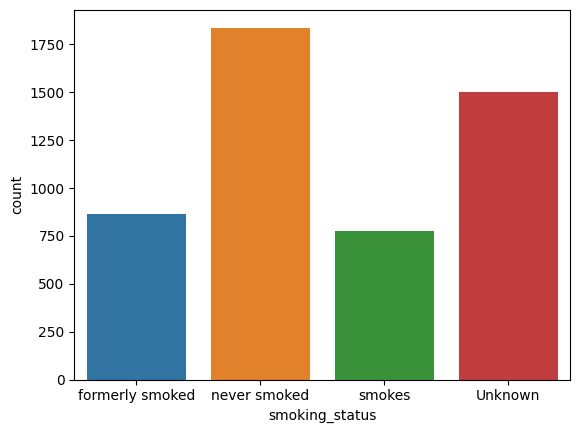

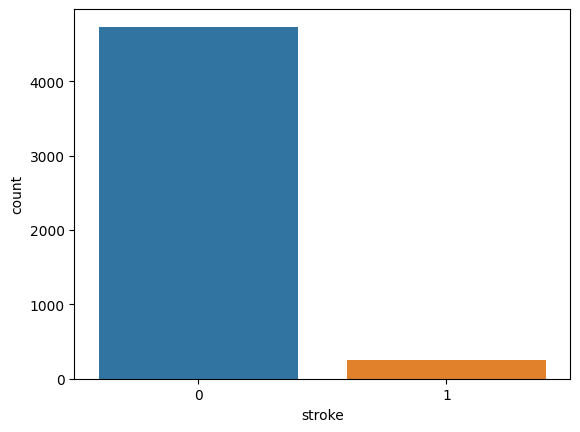

In [15]:
for col in df.columns:
  if col in ['bmi', 'age', 'avg_glucose_level']:
    continue
  else:
    sns.countplot(data=df, x=col)
    plt.show()
    print()

**Kasus yang terkena stroke berdasarkan Gender**

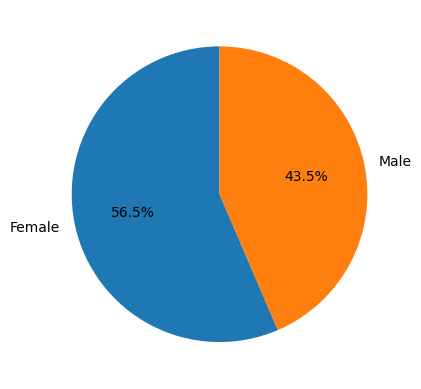

In [16]:
stroke_cases = df[df['stroke'] == 1]
plt.pie(stroke_cases['gender'].value_counts(), labels=stroke_cases['gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

**Kasus yang tidak terkena stroke berdasarkan Gender**

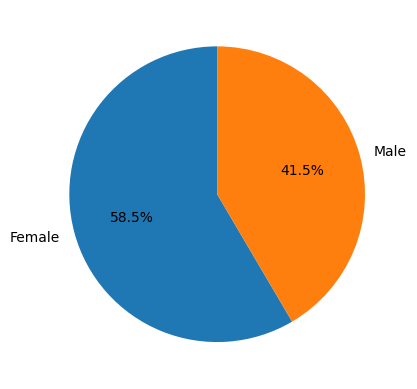

In [17]:
stroke_cases = df[df['stroke'] == 0]
plt.pie(stroke_cases.gender.value_counts(), labels=stroke_cases.gender.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

**Kasus yang terkena stroke berdasarkan status pernikahan**

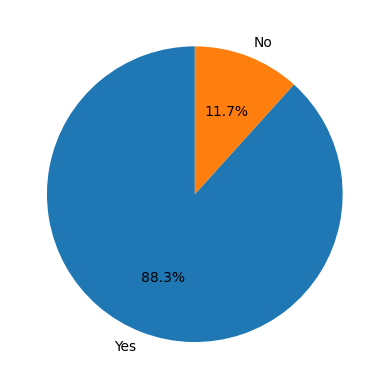

In [18]:
stroke_cases = df[df['stroke'] == 1]
plt.pie(stroke_cases['ever_married'].value_counts(), labels=stroke_cases['ever_married'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

**Kasus yang tidak terkena stroke berdasarkan status pernikahan**

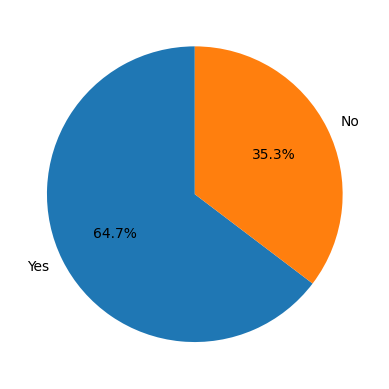

In [19]:
stroke_cases = df[df['stroke'] == 0]
plt.pie(stroke_cases['ever_married'].value_counts(), labels=stroke_cases['ever_married'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

**Kasus yang terkena stroke berdasarkan work_type**

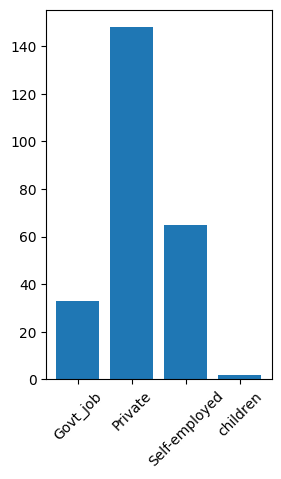

In [20]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 1]
stroke_counts_by_work_type = stroke_cases.groupby('work_type').size()
plt.bar(stroke_counts_by_work_type.index, stroke_counts_by_work_type.values)
plt.xticks(rotation=45)
plt.show()

**Kasus yang tidak terkena stroke berdasarkan work_type**

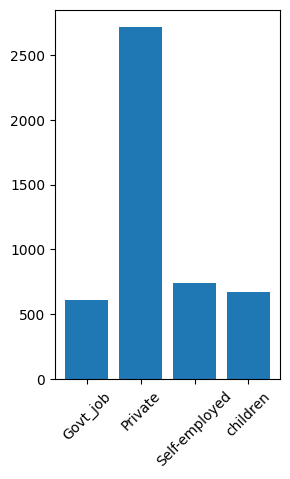

In [21]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 0]
stroke_counts_by_work_type = stroke_cases.groupby('work_type').size()
plt.bar(stroke_counts_by_work_type.index, stroke_counts_by_work_type.values)
plt.xticks(rotation=45)
plt.show()

**Kasus yang terkena stroke berdasarkan Residence_type**

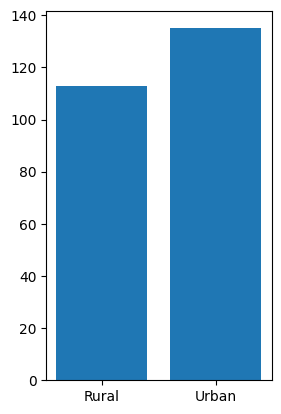

In [22]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 1]
stroke_counts_by_Residence_type = stroke_cases.groupby('Residence_type').size()
plt.bar(stroke_counts_by_Residence_type.index, stroke_counts_by_Residence_type.values)
plt.show()

**Kasus yang tidak terkena stroke berdasarkan Residence_type**

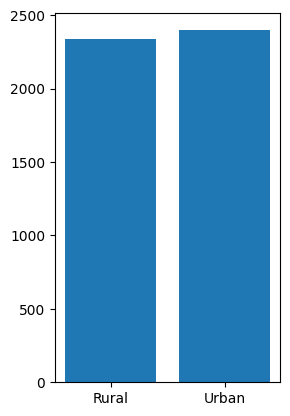

In [23]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 0]
stroke_counts_by_Residence_type = stroke_cases.groupby('Residence_type').size()
plt.bar(stroke_counts_by_Residence_type.index, stroke_counts_by_Residence_type.values)
plt.show()

**Kasus yang terkena stroke berdasarkan status merokok**

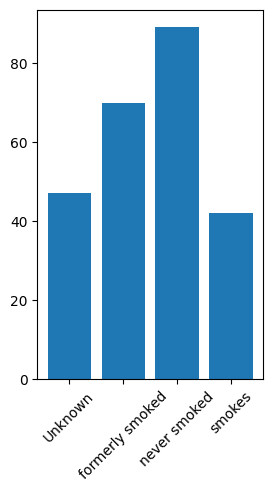

In [24]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 1]
stroke_counts_by_smoking_status = stroke_cases.groupby('smoking_status').size()
plt.bar(stroke_counts_by_smoking_status.index, stroke_counts_by_smoking_status.values)
plt.xticks(rotation=45)
plt.show()

**Kasus yang tidak terkena stroke berdasarkan status merokok**

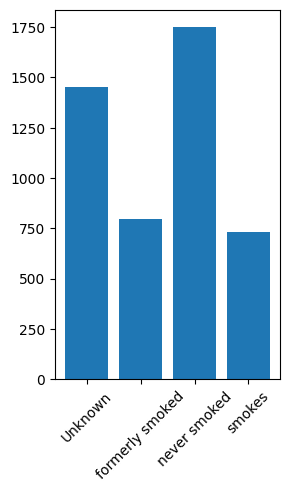

In [25]:
plt.subplot(1,2,1)
stroke_cases = df[df['stroke'] == 0]
stroke_counts_by_smoking_status = stroke_cases.groupby('smoking_status').size()
plt.bar(stroke_counts_by_smoking_status.index, stroke_counts_by_smoking_status.values)
plt.xticks(rotation=45)
plt.show()

Saya rasa dataset yang dipakai pada kesempatan kali ini tidak cukup balance. Coba saya cek.

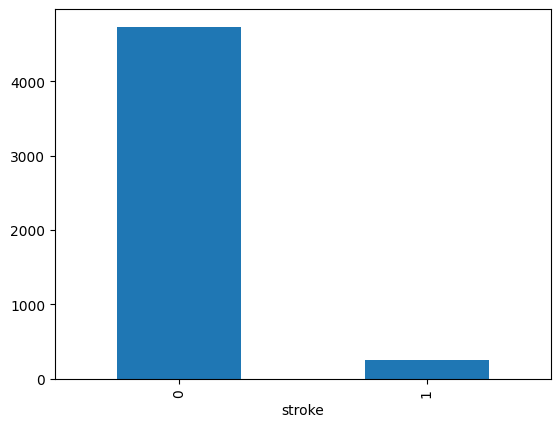

In [26]:
stroke_cases = df.groupby('stroke').count()
stroke_cases['gender'].plot(kind='bar')
xmin, xmax, ymin, ymax = plt.axis()
plt.style.use('ggplot')
plt.show()

# Preprocessing

Karena dataset-nya tidak balance, saya akan menggunakan SMOTE untuk melakukan balancing. Sebelum itu saya akan menyesuaikan terlebih dahulu fitur boolean yang direpresentasikan sebagai string.

In [27]:
df['ever_married'] = [ 0 if i !='Yes' else 1 for i in df['ever_married'] ]
df['gender'] = [0 if i != 'Female' else 1 for i in df['gender']]

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [29]:
categorical_cols = ['work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(df, columns=categorical_cols)

In [30]:
Y = data['stroke']
X = data.drop(['stroke'],axis=1)
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
data = pd.concat([X, Y], axis=1)

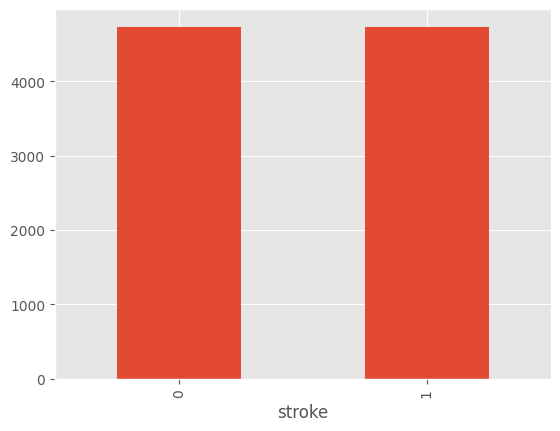

In [31]:
df = data.groupby('stroke').count()
df['age'].plot(kind='bar')
xmin, xmax, ymin, ymax = plt.axis()
plt.style.use('ggplot')
plt.show()

Yaps, sudah balance! Cek dulu korelasinya

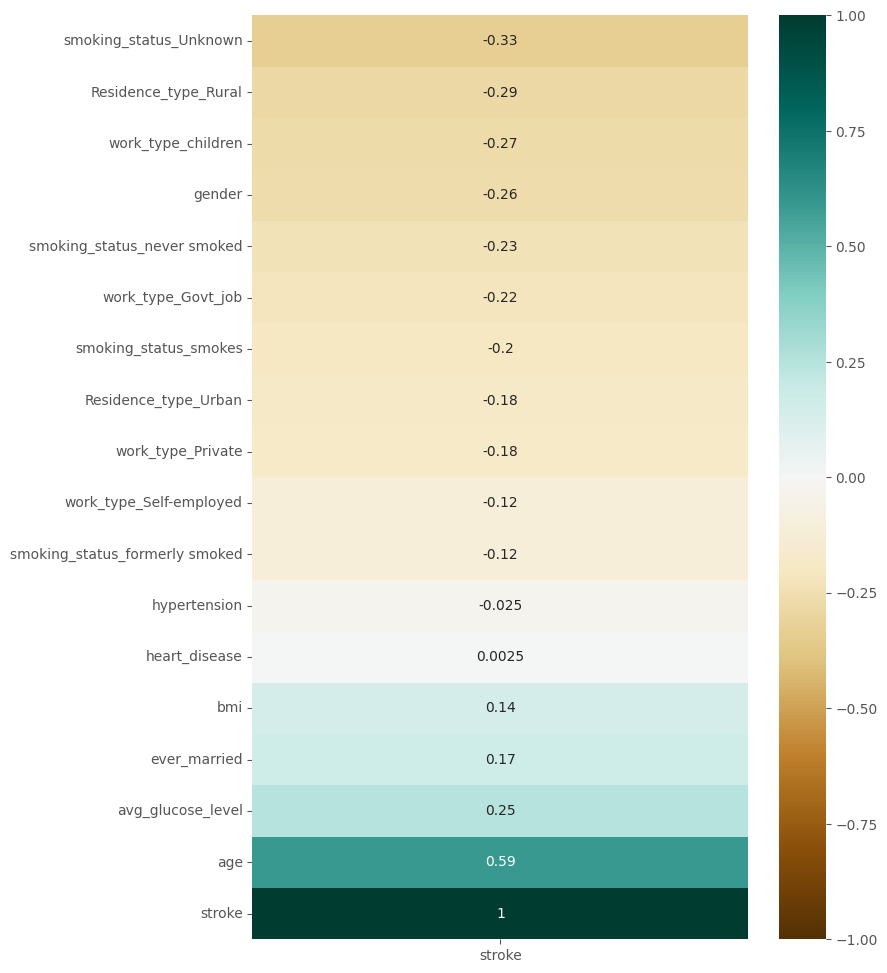

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['stroke']].sort_values(by='stroke'), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Ada korelasi yang rendah dengan hypertension dan heart_disease, mungkin karena pengambilan sampel yang berlebihan, namun saya akan tetap menggunakan semua fitur

# Modeling

In [33]:
X = data.drop(['stroke'], axis=1)
Y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=3)

In [34]:
model = DecisionTreeClassifier(criterion='entropy', random_state=3, max_depth=5)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

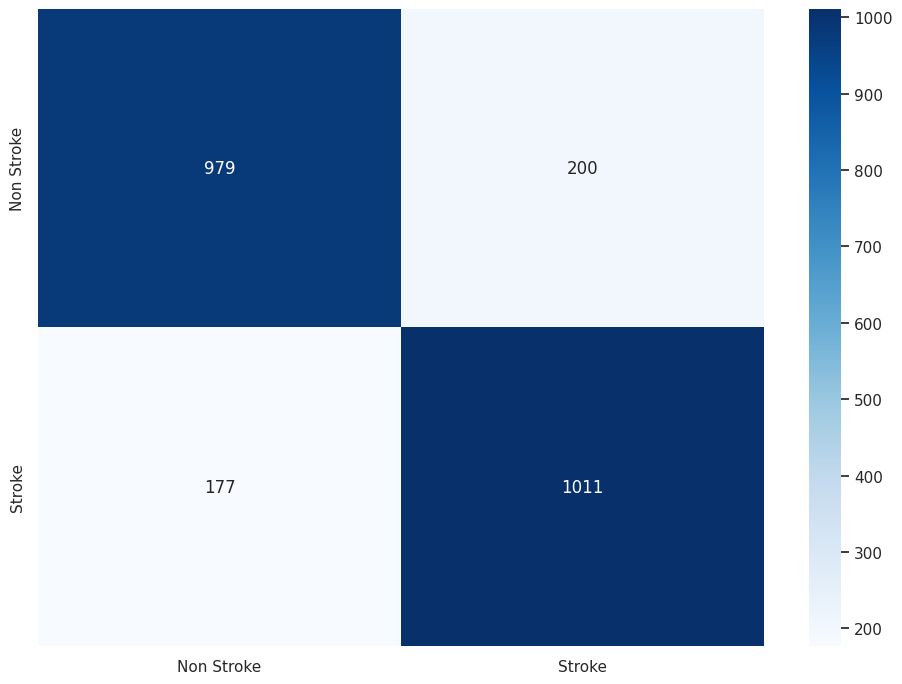

Training-set accuracy score: 0.8544865474010424
Test-set accuracy score: 0.8407266582171525


In [35]:
cm = confusion_matrix(y_test, y_pred1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.xaxis.set_ticklabels(['Non Stroke','Stroke'])
ax.yaxis.set_ticklabels(['Non Stroke','Stroke'])

plt.show()

print('Training-set accuracy score:', model.score(X_train, y_train))
print('Test-set accuracy score:', model.score(X_test, y_test))

In [39]:
X_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
6567,0,60.841002,0,0,1,194.215143,31.513640,0,0,0,0,0,0,0,0,0,0
5049,0,74.580360,0,0,1,61.850539,28.100000,0,0,0,0,0,0,0,0,0,0
3801,0,52.000000,0,1,1,87.000000,30.900000,0,1,0,0,0,1,0,0,1,0
4756,1,19.000000,0,0,0,90.570000,24.200000,0,1,0,0,0,1,1,0,0,0
6978,1,51.566956,0,0,1,99.552021,26.789740,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,1,77.844722,0,0,1,106.503978,32.689445,0,1,0,0,0,1,0,0,0,0
6400,1,78.229357,0,0,0,205.830918,32.001836,0,1,0,0,0,1,0,0,0,0
9160,0,72.154087,0,0,1,195.294529,33.349844,0,0,1,0,0,1,0,0,0,0
1688,0,37.000000,0,0,0,90.950000,24.600000,0,1,0,0,0,1,0,0,0,1


In [47]:
test = np.array([[1, 19, 0, 0, 0, 104.52, 24.4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]])
pred = model.predict(test)
'Aman' if pred[0] == 0 else 'Duh'

'Aman'

# Visualisasi

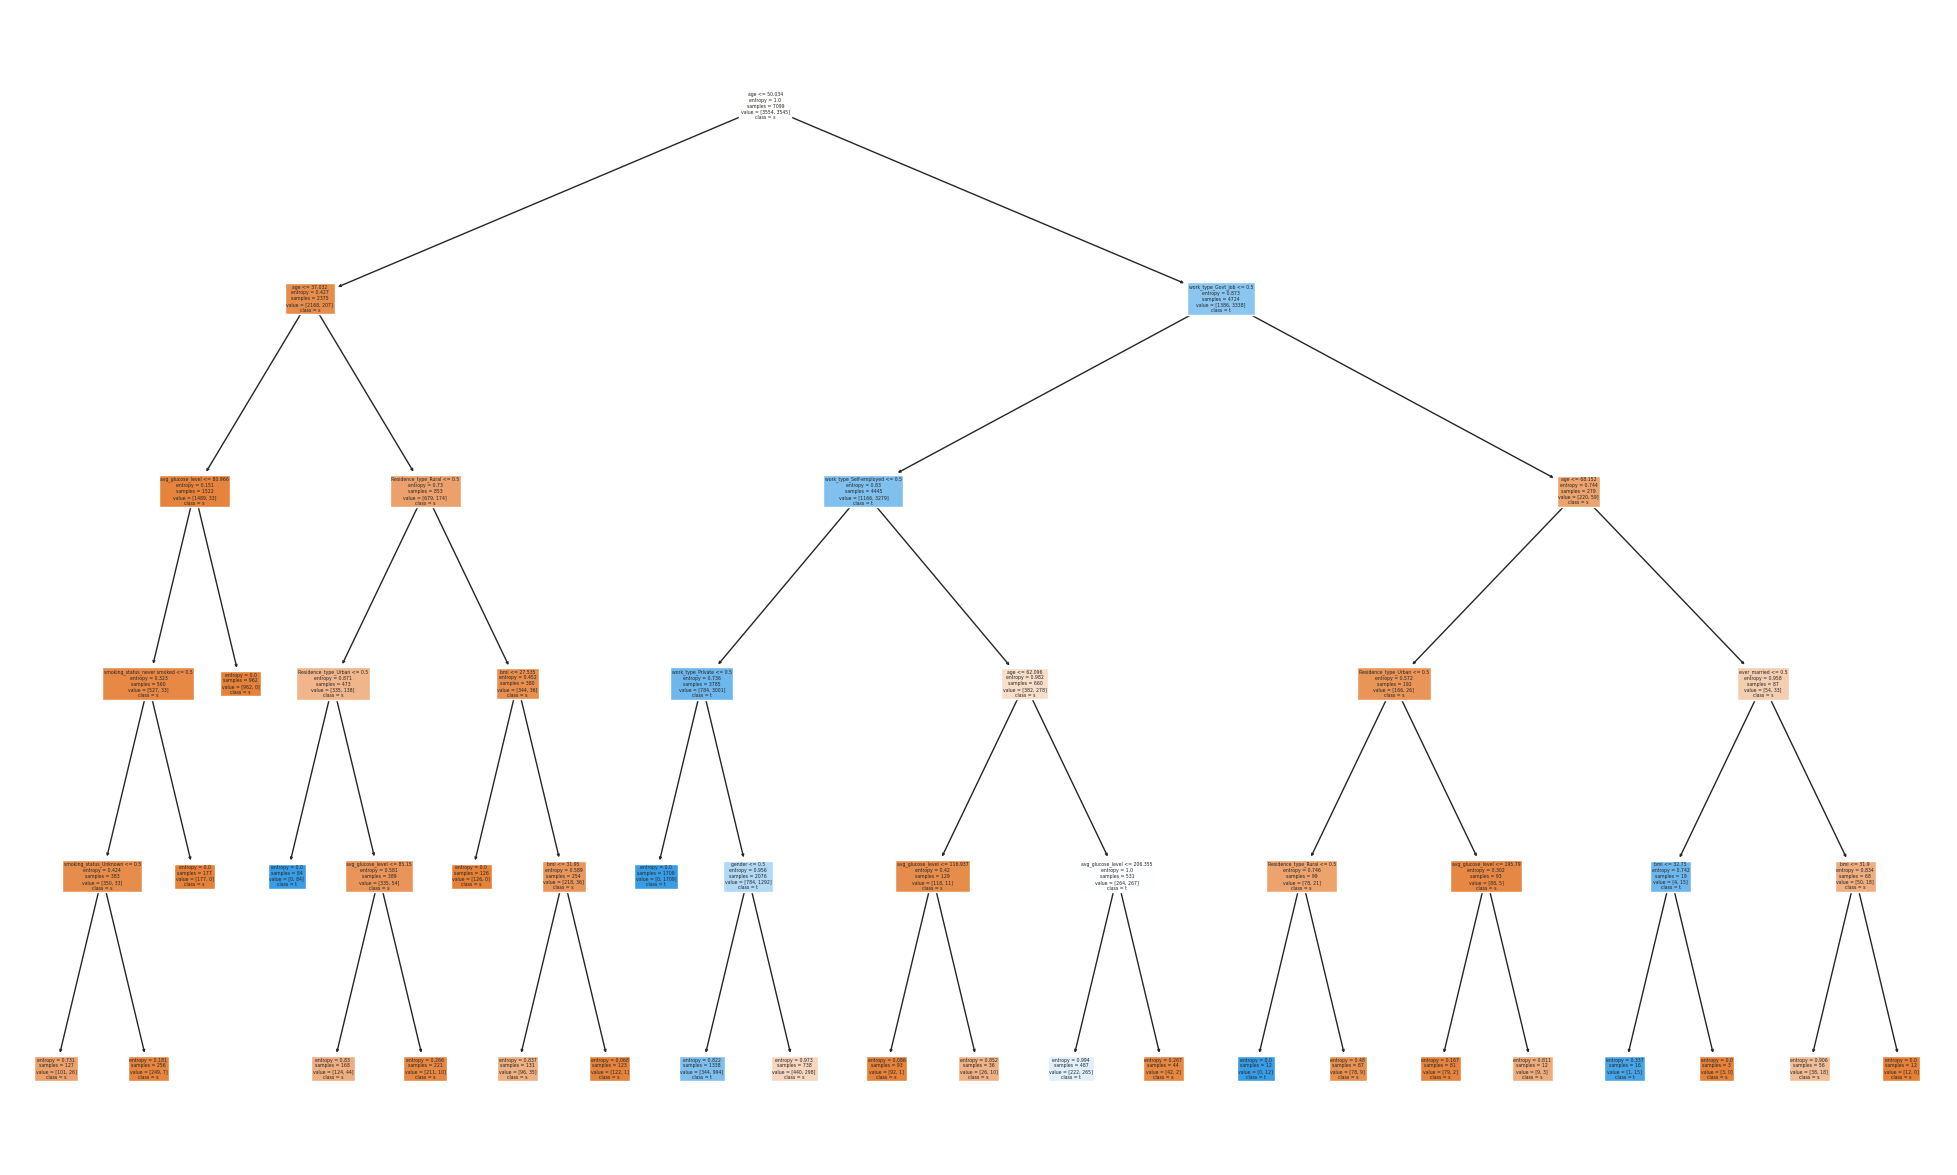

In [44]:
plt.figure(figsize=(25,15))
plot_tree(model, feature_names=X_train.columns, class_names='stroke', filled=True)
plt.show()

# Save Model

In [51]:
pickle.dump(model, open('model.sav', 'wb'))